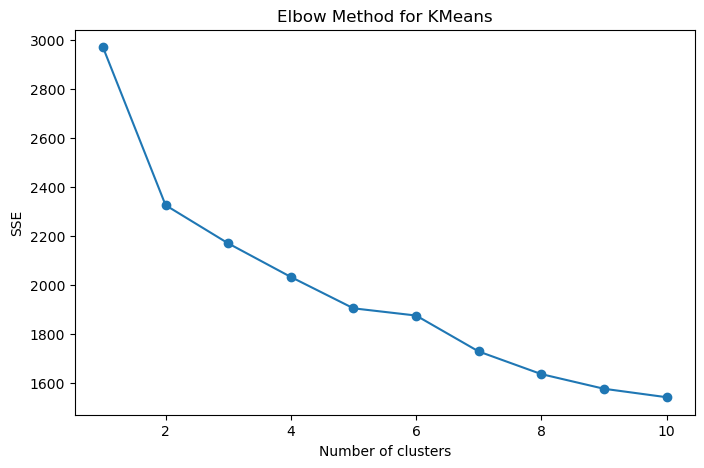

K-Means vs Actual:
 Actual           0   1   2   3  4
Cluster_KMeans                   
0               34   9   1   0  1
1               25   7  13   7  5
2               87  14   1   1  0
3                0   7  12  16  7
4               14  17   8  11  0


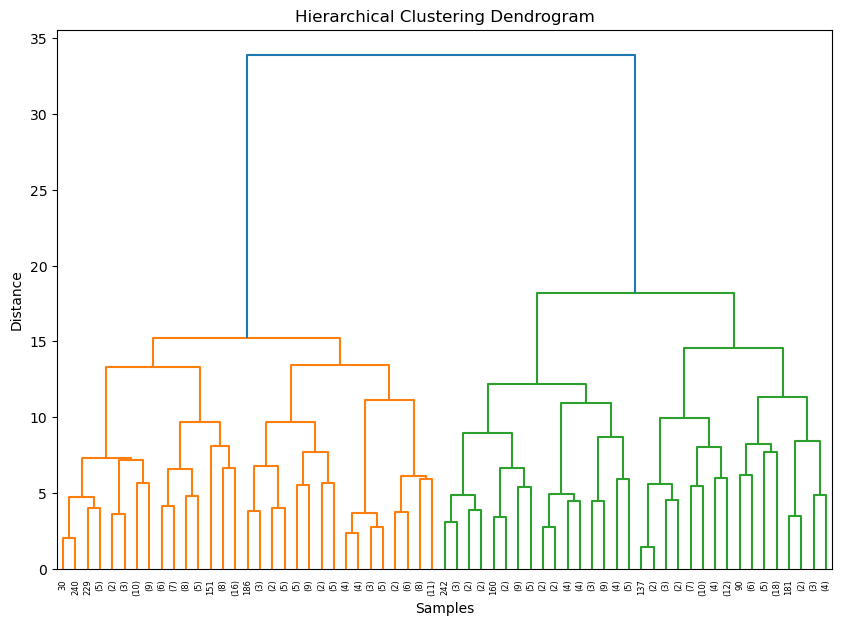

Hierarchical vs Actual:
 Actual                 0   1   2   3  4
Cluster_Hierarchical                   
0                     55  16   1   2  1
1                     70  10   2   1  0
2                     27  14   7   8  2
3                      5   2  15  11  7
4                      3  12  10  13  3


In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics import confusion_matrix


df = pd.read_csv('heart_disease_cleaned.csv')

selected_features = ['age', 'cp', 'trestbps', 'chol', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal']
X = df[selected_features].values
y = df['num'].values

# Standardization
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# K-Means Clustering
# Elbow Method
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    sse.append(kmeans.inertia_)

plt.figure(figsize=(8,5))
plt.plot(range(1,11), sse, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.title('Elbow Method for KMeans')
plt.show()


kmeans = KMeans(n_clusters=5, random_state=42)
df['Cluster_KMeans_5'] = kmeans.fit_predict(X_scaled)


cm_kmeans = pd.crosstab(df['Cluster_KMeans_5'], df['num'], rownames=['Cluster_KMeans'], colnames=['Actual'])
print("K-Means vs Actual:\n", cm_kmeans)

# Hierarchical Clustering 
# Dendrogram
linked = linkage(X_scaled, method='ward')
plt.figure(figsize=(10, 7))
dendrogram(linked, truncate_mode='level', p=5)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Samples')
plt.ylabel('Distance')
plt.show()


hierarchical = AgglomerativeClustering(n_clusters=5, metric='euclidean', linkage='ward')
df['Cluster_Hierarchical_5'] = hierarchical.fit_predict(X_scaled)


cm_hierarchical = pd.crosstab(df['Cluster_Hierarchical_5'], df['num'], rownames=['Cluster_Hierarchical'], colnames=['Actual'])
print("Hierarchical vs Actual:\n", cm_hierarchical)
